In [1]:
from couplevae import *
import scanpy as sc
# 环境配置与包导入
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use('Agg')  # 如果你在 Notebook 中想显示图，可以注释掉这一行
from scipy.sparse import issparse
from scipy import sparse
from adjustText import adjust_text

from couplevae import *  # 确保你已经正确安装了 couplevae


In [2]:
adata=sc.read('data\\train/train_species.h5ad')
adata.obs

,species,condition
0,mouse,LPS6
1,mouse,LPS6
2,mouse,LPS6
3,mouse,LPS6
4,mouse,LPS6
...,...,...
55417,rat,control
55418,rat,control
55419,rat,control
55420,rat,control


In [3]:
# adata.obs['n_counts'] = adata.X.sum(1)
# adata.obs['log_counts'] = np.log(adata.obs['n_counts'])
# adata.obs['n_genes'] = (adata.X > 0).sum(1)


In [4]:
# mt_gene_mask = [gene.startswith('mt-') for gene in adata.var_names]
# ribo_gene_mask = [(gene.startswith('Rps') or gene.startswith('Rpl')) for gene in adata.var_names]
# hbb_gene_mask = [gene.startswith('Hbb') for gene in adata.var_names]
# adata.obs['hbb_frac'] = np.asarray(adata.X[:, np.flatnonzero(hbb_gene_mask)].sum(1)).flatten()/adata.obs['n_counts']
# adata.obs['ribo_frac'] = np.asarray(adata.X[:, np.flatnonzero(ribo_gene_mask)].sum(1)).flatten()/adata.obs['n_counts']
# adata.obs['mt_frac'] = np.asarray(adata.X[:, np.flatnonzero(mt_gene_mask)].sum(1)).flatten()/adata.obs['n_counts']

In [5]:
# #Data quality summary plots
# # %matplotlib inline
# p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='mt_frac')
# p1 = sc.pl.scatter(adata, 'n_counts', 'n_genes', color='species')

In [6]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1, 3, figsize=(10, 5))
# species_list = ['rat', 'mouse', 'pig', 'rabbit']

# # 第一个子图：histogram（不含密度）
# for species in species_list:
#     subset = adata.obs['n_counts'][adata.obs['species'] == species]
#     sns.histplot(subset, kde=False, ax=ax[0], label=species, bins=50, element="step")

# # 第二个子图：histogram + KDE
# for species in species_list:
#     subset = adata.obs['n_counts'][adata.obs['species'] == species]
#     sns.histplot(subset, kde=True, ax=ax[1], label=species, bins=50, element="step")

# # 第三个子图：若要绘制标准化/分布差异，需要明确分析目标
# # 暂时空置或替换为其他对比分析图

# for a in ax:
#     a.legend()
#     a.set_xlabel('n_counts')

# plt.tight_layout()
# plt.show()


In [7]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# # 使用 Set2 色板（柔和、不荧光）
# colors = sns.color_palette("Set2", n_colors=4)
# species_list = ['rat', 'mouse', 'pig', 'rabbit']

# # 第一张图：完整分布
# for sp, color in zip(species_list, colors):
#     subset = adata.obs['n_genes'][adata.obs['species'] == sp]
#     sns.histplot(subset, kde=False, ax=ax[0], bins=60,
#                  label=sp, element="step", color=color, alpha=0.8)

# ax[0].legend()
# ax[0].set_title("Distribution of n_genes (all)")
# ax[0].set_xlabel("n_genes")

# # 第二张图：<2000 过滤后分布
# for sp, color in zip(species_list, colors):
#     subset = adata.obs['n_genes'][(adata.obs['species'] == sp) & (adata.obs['n_genes'] < 2000)]
#     sns.histplot(subset, kde=False, ax=ax[1], bins=60,
#                  label=sp, element="step", color=color, alpha=0.8)

# ax[1].legend()
# ax[1].set_title("Distribution of n_genes (<2000)")
# ax[1].set_xlabel("n_genes")

# plt.tight_layout()
# plt.show()


In [8]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # 设置无网格的图像风格
# sns.set(style="white")

# # 柔和配色
# colors = sns.color_palette("Set2", n_colors=4)
# species_list = ['rat', 'mouse', 'pig', 'rabbit']

# # 创建图
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# for sp, color in zip(species_list, colors):
#     subset = adata.obs['mt_frac'][adata.obs['species'] == sp]
#     sns.histplot(subset, kde=False, ax=ax, bins=50,
#                  label=sp, element="step", color=color, alpha=0.7)

# # 图例和标签
# ax.legend(title='Species', fontsize=10)
# ax.set_title("Distribution of mt_frac", fontsize=12)
# ax.set_xlabel("mt_frac")
# ax.set_ylabel("Cell Count")

# plt.tight_layout()
# plt.show()


In [9]:
# adata.obs['stim'] = [x[:3] if x != 'unst' else 'unst' for x in adata.obs['condition']]
# adata.obs['dosage'] = [x[-1] if x != 'unst' else '0' for x in adata.obs['condition']]

In [10]:
# adata.layers['counts'] = adata.X.copy()

In [11]:
# sc.pp.normalize_total(adata)
# sc.pp.log1p(adata)
# sc.pp.highly_variable_genes(adata, n_top_genes=5000, batch_key='species', subset=True)

In [12]:
# sc.pp.pca(adata)
# sc.pl.pca_scatter(adata, color=['species'])

In [13]:
# sc.pp.neighbors(adata)
# sc.tl.umap(adata)
# sc.pl.umap(adata, color='species')

In [14]:
# import scanpy as sc
# import matplotlib.pyplot as plt

# # # 计算邻接图和 UMAP
# # sc.pp.neighbors(adata)
# # sc.tl.umap(adata)

# # 绘图
# fig, ax = plt.subplots(1, 1)
# sc.pl.umap(adata, color='species', show=False, ax=ax)

# # 移除边框
# for spine in ax.spines.values():
#     spine.set_visible(False)

# # 可选：移除坐标轴刻度
# ax.set_xticks([])
# ax.set_yticks([])
# ax.axis("off") 
# # 可选标题
# ax.set_title('Species', fontweight='bold')

# plt.tight_layout()
# plt.show()


In [15]:
# fig, ax = plt.subplots(1, 1)
# sc.pl.umap(adata, color='condition', show=False, ax=ax)
# ax.set_title('Perturbation', fontweight='bold')

# # 移除边框
# for spine in ax.spines.values():
#     spine.set_visible(False)

# # 可选：移除坐标轴刻度
# ax.set_xticks([])
# ax.set_yticks([])
# ax.axis("off") 
# # 可选标题

In [16]:
# adata=sc.read('/data/CoupleVAE-master/data/train_species.h5ad')
# adata.obs['condition']

In [17]:
# adata.obs['species']

In [18]:
from couplevae import *
import scanpy as sc
# 环境配置与包导入
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.use('Agg')  # 如果你在 Notebook 中想显示图，可以注释掉这一行
from scipy.sparse import issparse
from scipy import sparse
from adjustText import adjust_text

from couplevae import *  # 确保你已经正确安装了 couplevae


In [19]:
# 路径与参数设置
train_path = "data\\train/train_species.h5ad"
valid_path = "data\\valid/valid_species.h5ad"
test_path = "data\\test/test_species.h5ad"


In [20]:
data_name = "species"
cell_type = "mouse"
condition_key = "condition"
cell_type_key = "species"
pert_key = "LPS6"
ctrl_key = "control"
device = "cuda"  # 如果没有 GPU 可以设置为 "cpu"

In [21]:
# 加载 AnnData 数据
train = sc.read(train_path)
valid = sc.read(valid_path)
test = sc.read(test_path)


In [22]:
# def merge_species(adata, species_to_merge, new_label):
#     """
#     将指定物种合并为一个新类，并替换 adata.obs['species'] 中的值，同时删除原有类别。

#     参数：
#     - adata: AnnData 对象
#     - species_to_merge: 要合并的物种列表（如 ['rabbit', 'mouse']）
#     - new_label: 合并后的新类别名（如 'rabbit_mouse'）

#     返回：
#     - 修改后的 AnnData 对象
#     """
#     import pandas as pd

#     if 'species' not in adata.obs.columns:
#         raise ValueError("adata.obs 中不包含 'species' 列。")

#     # 如果是 categorical 类型
#     if pd.api.types.is_categorical_dtype(adata.obs['species']):
#         # 添加新类别（如果不存在）
#         if new_label not in adata.obs['species'].cat.categories:
#             adata.obs['species'] = adata.obs['species'].cat.add_categories([new_label])

#         # 替换值
#         mask = adata.obs['species'].isin(species_to_merge)
#         adata.obs.loc[mask, 'species'] = new_label

#         # 删除原来的类别
#         adata.obs['species'] = adata.obs['species'].cat.remove_categories(species_to_merge)
#     else:
#         # 否则转为字符串再替换
#         adata.obs['species'] = adata.obs['species'].astype(str)
#         mask = adata.obs['species'].isin(species_to_merge)
#         adata.obs.loc[mask, 'species'] = new_label

#     return adata


In [23]:
# species_to_merge = ['rabbit', 'mouse']
# new_label = 'rabbit_mouse'

# train = merge_species(train, species_to_merge, new_label)
# valid = merge_species(valid, species_to_merge, new_label)
# test = merge_species(test, species_to_merge, new_label)

In [24]:
train.obs['species'].value_counts()

rat       16734
mouse     14810
rabbit    14242
pig        9636
Name: species, dtype: int64

In [25]:
trainloader = load_h5ad_to_dataloader(train, condition_key, cell_type_key, 
                                       cell_type, ctrl_key, pert_key, device)
validloader = load_h5ad_to_dataloader(valid, condition_key, cell_type_key, 
                                       cell_type, ctrl_key, pert_key, device)
# cell_types = ["mouse", "pig", "rabbit"]

# trainloader, validloader = load_h5ad_to_dataloader(
#     train,
#     condition_key="condition",
#     cell_type_key="species",
#     cell_types=cell_types,
#     ctrl_key="control",
#     pert_key="LPS6",
#     device="cuda"
# )

# test_adata_c = test[(test.obs[condition_key]==ctrl_key)&(test.obs[cell_type_key]==cell_type)]  
# test_adata_p = test[(test.obs[condition_key]==pert_key)&(test.obs[cell_type_key]==cell_type)]



In [26]:
network = VAE(x_dim=train.X.shape[1],
              z_dim=200,
              alpha=0.00005,
              beta=0.05,
              dropout_rate=0.1,
              learning_rate=0.0001)

trainer = Trainer(model=network, learning_rate=0.0001, n_epochs=200, patience=20, batch_size=32)

# 训练模型
trainer.train(train_loader=trainloader, valid_loader=validloader)

d:\anaconda\envs\couplevae_env\Lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
d:\anaconda\envs\couplevae_env\Lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Epoch 1, Train Loss: 817.6977, Validation Loss: 715.7955
Epoch 2, Train Loss: 715.3595, Validation Loss: 684.2421
Epoch 3, Train Loss: 694.0630, Validation Loss: 674.2665
Epoch 4, Train Loss: 680.5887, Validation Loss: 662.5413
Epoch 5, Train Loss: 670.8676, Validation Loss: 657.8474
Epoch 6, Train Loss: 664.6273, Validation Loss: 653.5293
Epoch 7, Train Loss: 659.3202, Validation Loss: 650.6172
Epoch 8, Train Loss: 654.4395, Validation Loss: 647.3100
Epoch 9, Train Loss: 649.4453, Validation Loss: 644.7525
Epoch 10, Train Loss: 644.2112, Validation Loss: 643.5321
Epoch 11, Train Loss: 640.3799, Validation Loss: 642.2758
Epoch 12, Train Loss: 635.9347, Validation Loss: 639.4628
Epoch 13, Train Loss: 631.7148, Validation Loss: 640.6069
Epoch 14, Train Loss: 628.0654, Validation Loss: 638.4018
Epoch 15, Train Loss: 624.4735, Validation Loss: 637.3909
Epoch 16, Train Loss: 620.8705, Validation Loss: 635.2363
Epoch 17, Train Loss: 617.7331, Validation Loss: 633.5136
Epoch 18, Train Loss: 6

In [27]:
cell_type_test = "mouse"
test_adata_c = test[(test.obs[condition_key] == ctrl_key) & (test.obs[cell_type_key] == cell_type_test)]
test_adata_p = test[(test.obs[condition_key] == pert_key) & (test.obs[cell_type_key] == cell_type_test)]


In [ ]:
pred = network.predict(test_adata_c, test_adata_p)

# 包装为 AnnData
pred_adata = anndata.AnnData(pred, 
                             obs={condition_key: [f"{cell_type_test}_pred_pert"] * len(pred),
                                  cell_type_key: [cell_type_test] * len(pred)},
                             var={"var_names": test_adata_c.var_names})

if sparse.issparse(test_adata_c.X):
    test_adata_c.X = test_adata_c.X.toarray() 
ctrl_adata = anndata.AnnData(test_adata_c.X,
                             obs={condition_key: [f"{cell_type_test}_ctrl"] * len(test_adata_c),
                                  cell_type_key: [cell_type_test] * len(test_adata_c)},
                             var={"var_names": test_adata_c.var_names})

if sparse.issparse(test_adata_p.X):
    test_adata_p.X = test_adata_p.X.toarray() 
real_stim_adata = anndata.AnnData(test_adata_p.X,
                                  obs={condition_key: [f"{cell_type_test}_real_pert"] * len(test_adata_p),
                                       cell_type_key: [cell_type_test] * len(test_adata_p)},
                                  var={"var_names": test_adata_p.var_names})

# 合并结果保存
all_data = ctrl_adata.concatenate(pred_adata, real_stim_adata)
all_data.write_h5ad(f"/data/CoupleVAE-master/data1/{data_name}_{cell_type}.h5ad")


C:\Users\jerry-ai\AppData\Local\Temp\ipykernel_33384\3078005693.py:24: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  all_data = ctrl_adata.concatenate(pred_adata, real_stim_adata)


In [29]:
all_data.obs

,condition,species,batch
0-0,mouse_ctrl,mouse,0
1-0,mouse_ctrl,mouse,0
2-0,mouse_ctrl,mouse,0
3-0,mouse_ctrl,mouse,0
4-0,mouse_ctrl,mouse,0
...,...,...,...
931-2,mouse_real_pert,mouse,2
932-2,mouse_real_pert,mouse,2
933-2,mouse_real_pert,mouse,2
934-2,mouse_real_pert,mouse,2


In [30]:
def plot_gene_correlation(data, cond_col, axes_map, label_map, file_path='./output_plot.pdf', 
                          genes_of_interest=None, top_genes=None, show_plot=False, include_legend=True, 
                          plot_title='', x_offset=0.05, y_offset=0.95, text_size=14, reg_type='mean'):
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from adjustText import adjust_text
    from scipy.sparse import issparse

    sns.set(style="white", context="notebook")  # 或 'talk', 'paper'
    plt.rcParams['axes.linewidth'] = 1.2  # 坐标轴线宽
    plt.rcParams['xtick.major.width'] = 1.2
    plt.rcParams['ytick.major.width'] = 1.2

    if genes_of_interest is None:
        genes_of_interest = []
    if top_genes is None:
        top_genes = []

    if issparse(data.X):
        data.X = data.X.toarray()

    group_y = data[data.obs[cond_col] == axes_map['y'], :]
    group_x = data[data.obs[cond_col] == axes_map['x'], :]

    # 选择均值或方差
    if reg_type == 'mean':
        avg_func = np.mean
    elif reg_type == 'var':
        avg_func = np.var
    else:
        raise ValueError("reg_type must be 'mean' or 'var'")

    r_squared_top = None
    if len(top_genes) > 0:
        subset_data_x = group_x[:, top_genes].X
        subset_data_y = group_y[:, top_genes].X
        avg_x_genes = avg_func(subset_data_x, axis=0)
        avg_y_genes = avg_func(subset_data_y, axis=0)
        r_squared_top = np.corrcoef(avg_x_genes, avg_y_genes)[0, 1] ** 2
        print(f'R-squared for top genes: {r_squared_top:.2f}')

    avg_x = avg_func(group_x.X, axis=0)
    avg_y = avg_func(group_y.X, axis=0)
    r_squared_all = np.corrcoef(avg_x, avg_y)[0, 1] ** 2
    print(f'R-squared for all genes: {r_squared_all:.2f}')

    df = pd.DataFrame({label_map['x']: avg_x, label_map['y']: avg_y})

    sns.set_style("white")
    fig, ax = plt.subplots(figsize=(4, 4))

    sns.regplot(x=label_map['x'], y=label_map['y'], data=df,
                scatter_kws={'s': 60, 'alpha': 0.5},
                line_kws={'color': 'green'}, ax=ax)

    # from sklearn.ensemble import RandomForestRegressor

    # # 画散点
    # ax.scatter(df[label_map['x']], df[label_map['y']], s=60, alpha=0.5)

    # # 拟合随机森林
    # rf = RandomForestRegressor(n_estimators=100, random_state=0)
    # rf.fit(df[[label_map['x']]], df[label_map['y']])

    # # 构造拟合曲线点
    # x_range = np.linspace(df[label_map['x']].min(), df[label_map['x']].max(), 500).reshape(-1, 1)
    # y_pred = rf.predict(x_range)

    # # 绘制拟合曲线
    # ax.plot(x_range, y_pred, color='green', label='Random Forest Fit')



    ax.set_xlabel(label_map['x'], fontsize=text_size)
    ax.set_ylabel(label_map['y'], fontsize=text_size)
    ax.grid(False)

    if plot_title:
        ax.set_title(plot_title, fontsize=text_size)

    # 标注基因
    texts = []
    for gene in genes_of_interest[:10]:
        if gene in data.var_names:
            gene_idx = np.where(data.var_names == gene)[0][0]
            x_pos = avg_x[gene_idx]
            y_pos = avg_y[gene_idx]
            texts.append(ax.text(x_pos, y_pos, gene, fontsize=10, color='black'))
            ax.scatter(x_pos, y_pos, color='red', s=60, zorder=3)
    if texts:
        adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=0.6))

    # 使用 ax.transAxes 保证一致位置
    ax.text(x_offset, y_offset,
            r'$R^2_{\mathrm{all\ genes}}$' + f" = {r_squared_all:.2f}",
            transform=ax.transAxes, fontsize=text_size)

    if r_squared_top is not None:
        ax.text(x_offset, y_offset - 0.1,
                r'$R^2_{\mathrm{top\ 100\ DEGs}}$' + f" = {r_squared_top:.2f}",
                transform=ax.transAxes, fontsize=text_size)

    if include_legend:
        ax.legend(loc='best')

    plt.tight_layout()
    if file_path:
        plt.savefig(file_path, bbox_inches='tight', dpi=300)
    if show_plot:
        plt.show()
    plt.close()
    return fig

In [31]:
all_data.obs

,condition,species,batch
0-0,mouse_ctrl,mouse,0
1-0,mouse_ctrl,mouse,0
2-0,mouse_ctrl,mouse,0
3-0,mouse_ctrl,mouse,0
4-0,mouse_ctrl,mouse,0
...,...,...,...
931-2,mouse_real_pert,mouse,2
932-2,mouse_real_pert,mouse,2
933-2,mouse_real_pert,mouse,2
934-2,mouse_real_pert,mouse,2


In [32]:
result = all_data.copy()

In [33]:
sc.tl.rank_genes_groups(result, groupby="condition", n_genes=100, method="wilcoxon")

In [34]:
result.uns["rank_genes_groups"]["names"]

rec.array([('Msrb1', 'Dtwd1', 'Ccl3'), ('Soat1', 'Lrp11', 'Sod2'),
           ('Lgals3', 'Fbxo7', 'Nfkbia'), ('Ctsd', 'Ube2e2', 'Il1a'),
           ('Nceh1', 'Rcn1', 'Ehd1'), ('Sptssa', 'Zfp143', 'Ccl5'),
           ('Lipa', 'Prkab1', 'Nrp2'), ('Ahnak', 'Mtor', 'Ccl4'),
           ('Idh1', 'Dcp1a', 'Tnfrsf1b'), ('Erp29', 'Ddx10', 'Slc7a2'),
           ('Mbnl1', 'Prdm4', 'Cflar'), ('BC005537', 'Smg8', 'Abracl'),
           ('Lamp1', 'Tssc1', 'Isg15'), ('Tyrobp', 'Dmtf1', 'Tlr2'),
           ('Atp6v1a', 'Ambra1', 'Lcp1'), ('Slc43a2', 'Ublcp1', 'Nampt'),
           ('Psap', 'Zmym4', 'Cxcl16'), ('Arl8b', 'Csnk2a2', 'Acsl1'),
           ('S100a4', 'Nfyb', 'Cybb'), ('Cotl1', 'Oas2', 'Slc15a3'),
           ('Laptm5', 'Rab3ip', 'Slc31a2'), ('Il7r', 'Erap1', 'Clic4'),
           ('Cd84', 'Pcsk7', 'Malt1'), ('Ctsb', 'Pogz', 'Mapkapk2'),
           ('Ucp2', 'Ezh1', 'Tnfaip3'), ('Dusp3', 'Armc5', 'Cd40'),
           ('Anxa1', 'Fam208b', 'Tagln2'), ('Fabp5', 'Vps16', 'Lmo4'),
           ('Cd300lb',

R-squared for top genes: 1.00
R-squared for all genes: 1.00


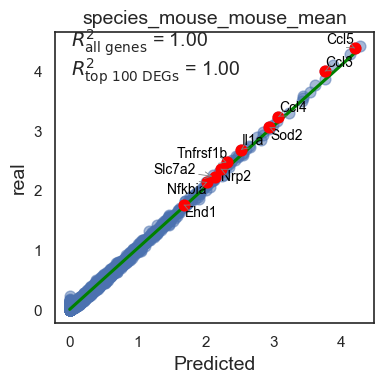

R-squared for top genes: 0.96
R-squared for all genes: 0.66


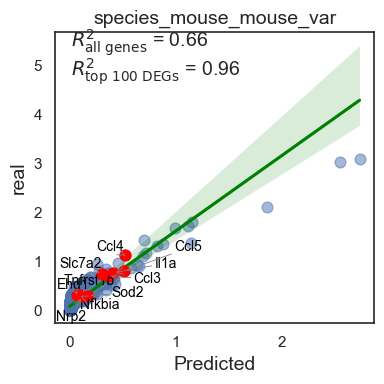

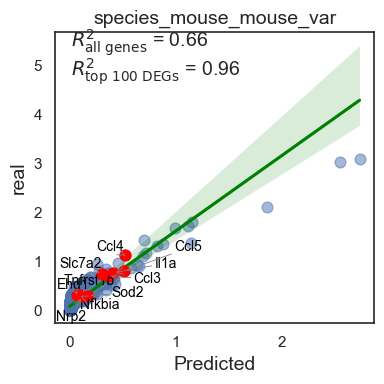

In [35]:
%matplotlib inline
result = all_data.copy()
# result = sc.read(f"/data/CoupleVAE-master/data1/{data_name}_{cell_type}.h5ad")

sc.tl.rank_genes_groups(result, groupby="condition", n_genes=100, method="wilcoxon")

diff_genes_covid = result.uns["rank_genes_groups"]["names"][f"{cell_type_test}_real_pert"]

conditions = {
    "ctrl": f"{cell_type_test}_ctrl",
    "pred_stim": f"{cell_type_test}_pred_pert",
    "real_stim": f"{cell_type_test}_real_pert"
}
plot_gene_correlation(data=result,
                      cond_col="condition",
                      axes_map={"x": conditions["pred_stim"], "y": conditions["real_stim"]},
                      label_map={"x": "Predicted", "y": "real"},
                      genes_of_interest=diff_genes_covid[:10],
                      top_genes=diff_genes_covid,
                      reg_type='mean',  # 或 'var'
                      plot_title=f"{data_name}_{cell_type}_{cell_type_test}_mean",
                      show_plot=True,
                    #   fontsize=12,
                      include_legend=False)
plot_gene_correlation(data=result,
                      cond_col="condition",
                      axes_map={"x": conditions["pred_stim"], "y": conditions["real_stim"]},
                      label_map={"x": "Predicted", "y": "real"},
                      genes_of_interest=diff_genes_covid[:10],
                      top_genes=diff_genes_covid,
                      reg_type='var',  # 或 'var'
                      plot_title=f"{data_name}_{cell_type}_{cell_type_test}_var",
                      show_plot=True,
                    #   fontsize=12,
                      include_legend=False)

In [36]:
result.obs

,condition,species,batch
0-0,mouse_ctrl,mouse,0
1-0,mouse_ctrl,mouse,0
2-0,mouse_ctrl,mouse,0
3-0,mouse_ctrl,mouse,0
4-0,mouse_ctrl,mouse,0
...,...,...,...
931-2,mouse_real_pert,mouse,2
932-2,mouse_real_pert,mouse,2
933-2,mouse_real_pert,mouse,2
934-2,mouse_real_pert,mouse,2


In [37]:
import scanpy as sc
import anndata
import os

species_list = ["mouse", "pig", "rabbit", "rat"]
file_template = "/data/CoupleVAE-master/data1/species_{}.h5ad"

adatas = []

for sp in species_list:
    file_path = file_template.format(sp)
    if not os.path.exists(file_path):
        print(f"❌ 文件不存在: {file_path}")
        continue

    print(f"✅ 正在读取：{file_path}")
    adata = sc.read_h5ad(file_path)

    # 检查标签是否标准（condition 应该是 rat_ctrl/rat_real_pert/rat_pred_pert）
    if "condition" not in adata.obs or "species" not in adata.obs:
        raise ValueError(f"{sp} 缺失 'condition' 或 'species' 列")

    # 确保 condition 为分类变量（可选）
    adata.obs["condition"] = adata.obs["condition"].astype("category")
    adata.obs["species"] = adata.obs["species"].astype("category")

    adatas.append(adata)

# 合并所有物种
adata_all = anndata.concat(adatas, join="outer", label="species_file", fill_value=0)
print(f"✅ 合并完成：总细胞数 {adata_all.n_obs}，基因数 {adata_all.n_vars}")


❌ 文件不存在: /data/CoupleVAE-master/data1/species_mouse.h5ad
❌ 文件不存在: /data/CoupleVAE-master/data1/species_pig.h5ad
❌ 文件不存在: /data/CoupleVAE-master/data1/species_rabbit.h5ad
❌ 文件不存在: /data/CoupleVAE-master/data1/species_rat.h5ad


ValueError: No objects to concatenate

In [ ]:
for sp in species_list:
    file_path = file_template.format(sp)
    if not os.path.exists(file_path):
        print(f"❌ 文件不存在: {file_path}")
        continue

    print(f"✅ 正在读取：{file_path}")
    adata = sc.read_h5ad(file_path)
    print(f"{sp} 数据形状: {adata.shape}")


✅ 正在读取：/data/CoupleVAE-master/data1/species_mouse.h5ad
mouse 数据形状: (2808, 6619)
✅ 正在读取：/data/CoupleVAE-master/data1/species_pig.h5ad
pig 数据形状: (3204, 6619)
✅ 正在读取：/data/CoupleVAE-master/data1/species_rabbit.h5ad
rabbit 数据形状: (2733, 6619)
✅ 正在读取：/data/CoupleVAE-master/data1/species_rat.h5ad
rat 数据形状: (3204, 6619)


In [ ]:
import anndata as ad

adata_all = ad.AnnData.concatenate(
    adatas[0], adatas[1:], 
    batch_key="species_file", 
    join="outer", 
    fill_value=0
)

print(f"合并完成：总细胞数 {adata_all.n_obs}，基因数 {adata_all.n_vars}")
print("condition种类:", adata_all.obs['condition'].unique())
print("species_file种类:", adata_all.obs['species_file'].unique())


/tmp/ipykernel_30401/3794149078.py:3: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_all = ad.AnnData.concatenate(


合并完成：总细胞数 11949，基因数 6619
condition种类: ['mouse_ctrl', 'mouse_pred_pert', 'mouse_real_pert', 'pig_ctrl', 'pig_pred_pert', ..., 'rabbit_pred_pert', 'rabbit_real_pert', 'rat_ctrl', 'rat_pred_pert', 'rat_real_pert']
Length: 12
Categories (12, object): ['mouse_ctrl', 'mouse_pred_pert', 'mouse_real_pert', 'pig_ctrl', ..., 'rabbit_real_pert', 'rat_ctrl', 'rat_pred_pert', 'rat_real_pert']
species_file种类: ['0', '1', '2', '3']
Categories (4, object): ['0', '1', '2', '3']


In [ ]:
import scanpy as sc

# 1. 过滤低表达基因和低质细胞
sc.pp.filter_cells(adata_all, min_genes=200)
sc.pp.filter_genes(adata_all, min_cells=3)

# 2. 归一化+log转（合并数据统一做一次）
sc.pp.normalize_total(adata_all, target_sum=1e4)
sc.pp.log1p(adata_all)

# 3. 高变基因筛选
sc.pp.highly_variable_genes(adata_all, flavor='seurat', n_top_genes=2000)

# 4. 只保留高变基因
adata_all = adata_all[:, adata_all.var.highly_variable]

# 5. 之后做差异分析，绘图等


/root/anaconda3/envs/couplevae/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:667: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}
/root/anaconda3/envs/couplevae/lib/python3.11/site-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/root/anaconda3/envs/couplevae/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

<Figure size 1600x800 with 0 Axes>

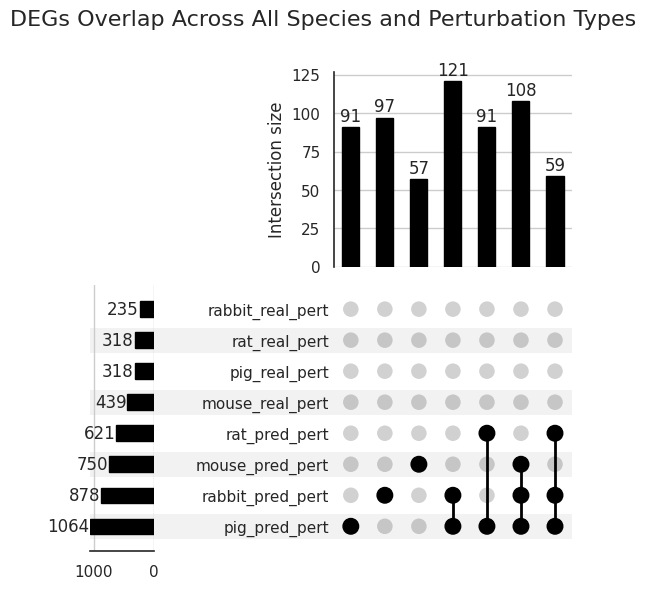

In [ ]:
import scanpy as sc
from upsetplot import UpSet, from_memberships
import matplotlib.pyplot as plt

species = ["mouse", "pig", "rabbit", "rat"]
deg_sets = {}

# 1. 差异分析：找所有物种的真实扰动和预测扰动相对于控制的差异基因
for sp in species:
    ctrl = f"{sp}_ctrl"
    real = f"{sp}_real_pert"
    pred = f"{sp}_pred_pert"
    
    # 真实扰动 vs 控制
    sc.tl.rank_genes_groups(adata_all, groupby="condition",
                            groups=[real], reference=ctrl,
                            method="wilcoxon")
    df_real = sc.get.rank_genes_groups_df(adata_all, group=real)
    sig_real = df_real[(df_real['pvals_adj'] < 0.05) & (df_real['logfoldchanges'].abs() > 1)]
    deg_sets[f"{sp}_real_pert"] = set(sig_real['names'])
    
    # 预测扰动 vs 控制
    sc.tl.rank_genes_groups(adata_all, groupby="condition",
                            groups=[pred], reference=ctrl,
                            method="wilcoxon")
    df_pred = sc.get.rank_genes_groups_df(adata_all, group=pred)
    sig_pred = df_pred[(df_pred['pvals_adj'] < 0.05) & (df_pred['logfoldchanges'].abs() > 1)]
    deg_sets[f"{sp}_pred_pert"] = set(sig_pred['names'])

# 2. 生成 membership 列表（每个基因在哪些组中出现）
all_genes = set.union(*deg_sets.values())
memberships = [
    [group for group, geneset in deg_sets.items() if gene in geneset]
    for gene in all_genes
]

# 3. 构造 UpSet 所需数据
data = from_memberships(memberships)

# 4. 绘制整体 UpSet 图
plt.figure(figsize=(16, 8))
UpSet(data, subset_size="count", show_counts=True, min_subset_size=50).plot()
plt.suptitle("DEGs Overlap Across All Species and Perturbation Types", fontsize=16)
plt.show()


In [ ]:
import scanpy as sc

species_list = ["mouse", "pig", "rabbit", "rat"]

deg_common = {}  # 每个物种中，real ∩ pred 的命中 DEG

for sp in species_list:
    ctrl = f"{sp}_ctrl"
    real = f"{sp}_real_pert"
    pred = f"{sp}_pred_pert"
    
    # 真实扰动 vs 控制
    sc.tl.rank_genes_groups(adata_all, groupby="condition", groups=[real], reference=ctrl, method="wilcoxon")
    df_real = sc.get.rank_genes_groups_df(adata_all, group=real)
    sig_real = df_real[(df_real['pvals_adj'] < 0.05) & (df_real['logfoldchanges'].abs() > 1)]
    deg_real = set(sig_real['names'])

    # 预测扰动 vs 控制
    sc.tl.rank_genes_groups(adata_all, groupby="condition", groups=[pred], reference=ctrl, method="wilcoxon")
    df_pred = sc.get.rank_genes_groups_df(adata_all, group=pred)
    sig_pred = df_pred[(df_pred['pvals_adj'] < 0.05) & (df_pred['logfoldchanges'].abs() > 1)]
    deg_pred = set(sig_pred['names'])

    # 命中 DEG（真实 ∩ 预测）
    deg_common[sp] = deg_real & deg_pred
    print(f"{sp} 命中 DEG 数: {len(deg_common[sp])}")

# ✅ 获取所有物种中共同的命中 DEG
shared_common_deg = set.intersection(*deg_common.values())
print(f"\n✅ 四个物种中共同命中 DEG 数量: {len(shared_common_deg)}")
print("基因列表:", list(shared_common_deg)[:10])  # 展示前几个


mouse 命中 DEG 数: 317
pig 命中 DEG 数: 256
rabbit 命中 DEG 数: 187
rat 命中 DEG 数: 239

✅ 四个物种中共同命中 DEG 数量: 41
基因列表: ['Cd274', 'Ier3', 'Cytip', 'Ccl3', 'Cd40', 'Pla2g16', 'Tnfsf10', 'Calcrl', 'Ccl5', 'Il1a']


In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

# 感兴趣基因列表
genes_to_plot = ['Ier3', 'Arid1b',  'Xaf1', 'Fas','Irf7', 'Il1a', 'Usp18', 'Icam1']

# 绘图，保持图像对象（show=False）
sc.pl.violin(
    adata_all, 
    keys=genes_to_plot, 
    groupby='condition', 
    jitter=0.4,
    rotation=0,             # 先不旋转，手动控制
    stripplot=False, 
    multi_panel=False,
    size=1.5,
    show=False              # ✅ 保留绘图对象
)

# 获取当前 figure 和 axes
fig = plt.gcf()
ax = fig.axes[0]  # 现在可以安全获取

# 提取标签并手动居中 + 旋转
xticks = ax.get_xticks()
xticklabels = [label.get_text() for label in ax.get_xticklabels()]
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=45, ha='center')

plt.tight_layout()
plt.show()


KeyError: "Could not find keys ['Fas'] in columns of `adata.obs` or in adata.var_names."

In [ ]:
import scanpy as sc

species = ["mouse", "pig", "rabbit", "rat"]
deg_sets = {}

for sp in species:
    ctrl = f"{sp}_ctrl"
    real = f"{sp}_real_pert"
    pred = f"{sp}_pred_pert"

    # --- 分析真实扰动 vs 控制 ---
    sc.tl.rank_genes_groups(adata_all, groupby="condition",
                            groups=[real], reference=ctrl,
                            method="wilcoxon", use_raw=False)
    df_real = sc.get.rank_genes_groups_df(adata_all, group=real)
    # 放宽阈值：abs(logFC) > 0.5，p < 0.1，并保留前300个显著基因
    df_real = df_real[(df_real['pvals_adj'] < 0.5) & (df_real['logfoldchanges'].abs() > 1)]
    df_real = df_real.sort_values("pvals_adj").head(1000)
    deg_sets[f"{sp}_real_pert"] = set(df_real['names'])

    # --- 分析预测扰动 vs 控制 ---
    sc.tl.rank_genes_groups(adata_all, groupby="condition",
                            groups=[pred], reference=ctrl,
                            method="wilcoxon", use_raw=False)
    df_pred = sc.get.rank_genes_groups_df(adata_all, group=pred)
    df_pred = df_pred[(df_pred['pvals_adj'] < 0.5) & (df_pred['logfoldchanges'].abs() > 1)]
    df_pred = df_pred.sort_values("pvals_adj").head(1000)
    deg_sets[f"{sp}_pred_pert"] = set(df_pred['names'])


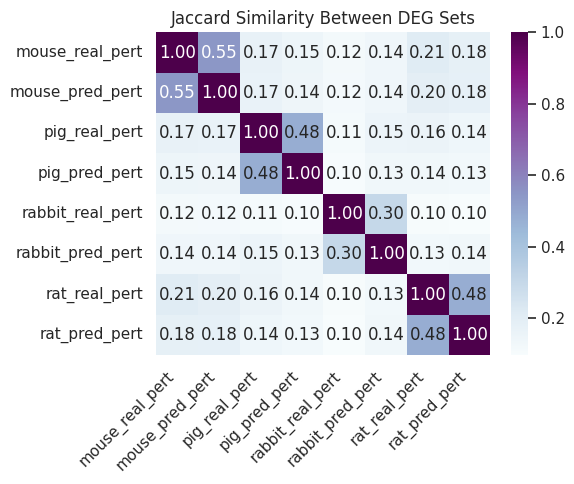

In [ ]:
import numpy as np
import seaborn as sns

groups = list(deg_sets.keys())
n = len(groups)
jaccard_mat = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        set_i = deg_sets[groups[i]]
        set_j = deg_sets[groups[j]]
        intersection = len(set_i.intersection(set_j))
        union = len(set_i.union(set_j))
        jaccard_mat[i, j] = intersection / union if union > 0 else 0

# plt.figure(figsize=(7, 6))
# sns.heatmap(jaccard_mat, xticklabels=groups, yticklabels=groups, cmap='Blues', annot=True, fmt='.2f')
# plt.title('Jaccard Similarity Between DEG Sets')
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)
# plt.tight_layout()
# plt.show()
plt.figure(figsize=(6, 5))
sns.heatmap(jaccard_mat, 
            xticklabels=groups, 
            yticklabels=groups, 
            cmap='BuPu',  # 改为紫色系
            annot=True, 
            fmt='.2f')
plt.title('Jaccard Similarity Between DEG Sets')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
df_jaccard = pd.DataFrame(jaccard_mat, index=groups, columns=groups)

sns.clustermap(df_jaccard, 
               cmap='coolwarm', 
               vmin=0, vmax=1,
               annot=True, fmt='.2f',
               figsize=(7, 6),
               linewidths=0.5, 
               linecolor='gray')
plt.title('Jaccard Similarity (Clustered)', pad=60)
plt.show()


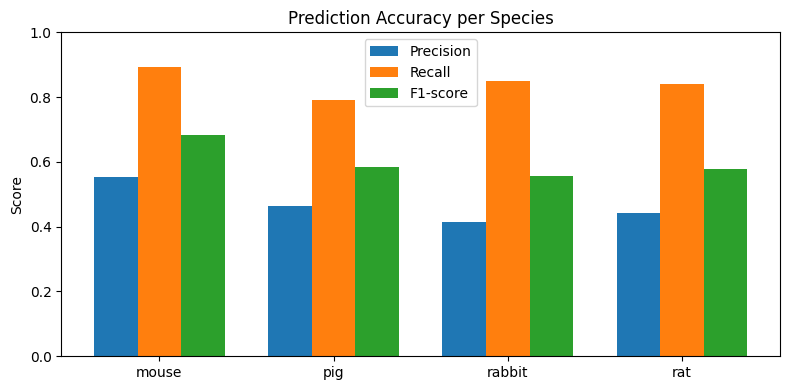

In [ ]:
import matplotlib.pyplot as plt

precisions, recalls, f1s = [], [], []

for sp in species:
    real_set = deg_real[sp]
    pred_set = deg_pred[sp]
    inter = len(real_set & pred_set)
    p = inter / len(pred_set) if len(pred_set) else 0
    r = inter / len(real_set) if len(real_set) else 0
    f1 = 2 * p * r / (p + r) if p + r else 0

    precisions.append(p)
    recalls.append(r)
    f1s.append(f1)

x = np.arange(len(species))
width = 0.25

plt.figure(figsize=(8,4))
plt.bar(x - width, precisions, width, label='Precision')
plt.bar(x, recalls, width, label='Recall')
plt.bar(x + width, f1s, width, label='F1-score')
plt.xticks(x, species)
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Prediction Accuracy per Species")
plt.legend()
plt.tight_layout()
plt.show()


Condition categories: ['pig_ctrl', 'pig_pred_pert', 'pig_real_pert']
Categories (3, object): ['pig_ctrl', 'pig_pred_pert', 'pig_real_pert']
真实扰动差异基因数: 743
预测扰动差异基因数: 1358
Precision: 0.449
Recall: 0.821
F1-score: 0.581


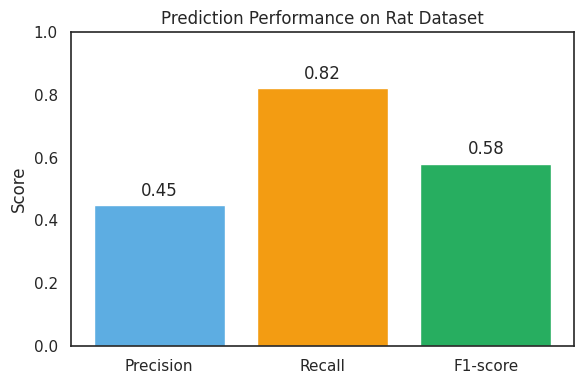

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np

# 读单个数据集
adata_rat = sc.read_h5ad("/data/CoupleVAE-master/data1/species_pig.h5ad")

# 确认 condition 分类是否合适
print("Condition categories:", adata_rat.obs['condition'].unique())

# 定义组名和阈值
ctrl = "pig_ctrl"
real = "pig_real_pert"
pred = "pig_pred_pert"
pval_cutoff = 0.05
logfc_cutoff = 1

# 1. 真实扰动 vs 控制做差异分析
sc.tl.rank_genes_groups(adata_rat, groupby="condition",
                        groups=[real], reference=ctrl,
                        method="wilcoxon")
df_real = sc.get.rank_genes_groups_df(adata_rat, group=real)
sig_real = df_real[(df_real['pvals_adj'] < pval_cutoff) & (df_real['logfoldchanges'].abs() > logfc_cutoff)]
real_deg = set(sig_real['names'])
print(f"真实扰动差异基因数: {len(real_deg)}")

# 2. 预测扰动 vs 控制做差异分析
sc.tl.rank_genes_groups(adata_rat, groupby="condition",
                        groups=[pred], reference=ctrl,
                        method="wilcoxon")
df_pred = sc.get.rank_genes_groups_df(adata_rat, group=pred)
sig_pred = df_pred[(df_pred['pvals_adj'] < pval_cutoff) & (df_pred['logfoldchanges'].abs() > logfc_cutoff)]
pred_deg = set(sig_pred['names'])
print(f"预测扰动差异基因数: {len(pred_deg)}")

# 3. 计算 Precision, Recall, F1
intersect = len(real_deg & pred_deg)
precision = intersect / len(pred_deg) if len(pred_deg) > 0 else 0
recall = intersect / len(real_deg) if len(real_deg) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

# 4. 可视化条形图
labels = ['Precision', 'Recall', 'F1-score']
scores = [precision, recall, f1]

plt.figure(figsize=(6,4))
bars = plt.bar(labels, scores, color=['#5DADE2', '#F39C12', '#27AE60'])
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title("Prediction Performance on Rat Dataset")
for i, v in enumerate(scores):
    plt.text(i, v + 0.03, f"{v:.2f}", ha='center', fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
import scanpy as sc

# 若已完成可以跳过以下步骤
sc.pp.scale(adata_all)
sc.tl.pca(adata_all, svd_solver='arpack')
sc.pp.neighbors(adata_all, n_neighbors=15, n_pcs=30)
sc.tl.umap(adata_all)


/root/anaconda3/envs/couplevae/lib/python3.11/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/root/anaconda3/envs/couplevae/lib/python3.11/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


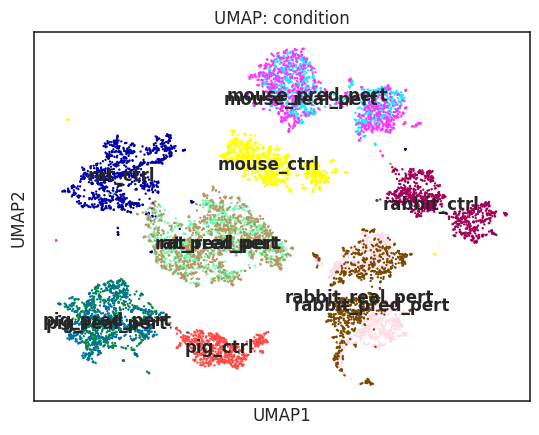

In [ ]:
# 按 condition 分类绘图
sc.pl.umap(adata_all, color="condition", title="UMAP: condition",palette=sc.pl.palettes.godsnot_102,legend_loc="on data")

# # 按 species 分类绘图
# sc.pl.umap(adata_all, color="species", title="UMAP: species", palette="tab10", legend_loc="on data")


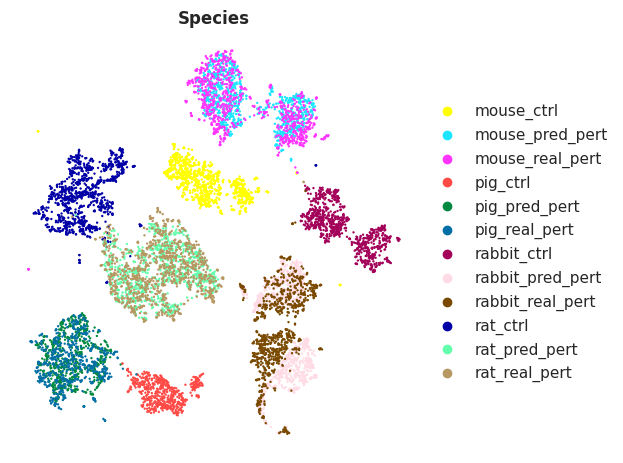

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

# # 计算邻接图和 UMAP
# sc.pp.neighbors(adata)
# sc.tl.umap(adata)

# 绘图
fig, ax = plt.subplots(1, 1)
sc.pl.umap(adata_all, color='condition', show=False, ax=ax)

# 移除边框
for spine in ax.spines.values():
    spine.set_visible(False)

# 可选：移除坐标轴刻度
ax.set_xticks([])
ax.set_yticks([])
ax.axis("off") 
# 可选标题
ax.set_title('Species', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# 为每个 cell 添加表达均值
adata_all.obs["expr_mean"] = (
    adata_all.X.mean(axis=1).A1 if hasattr(adata_all.X, "A1") else adata_all.X.mean(axis=1)
)


/tmp/ipykernel_1412742/4225162342.py:9: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1412742/4225162342.py:9: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1412742/4225162342.py:9: UserWarning: Glyph 29289 (\N{CJK UNIFIED IDEOGRAPH-7269}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1412742/4225162342.py:9: UserWarning: Glyph 31181 (\N{CJK UNIFIED IDEOGRAPH-79CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1412742/4225162342.py:9: UserWarning: Glyph 21644 (\N{CJK UNIFIED IDEOGRAPH-548C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1412742/4225162342.py:9: UserWarning: Glyph 26465 (\N{CJK UNIFIED IDEOGRAPH-6761}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1412742/4225162342.py:9: UserWarning: Glyph 20214 (\N{CJK UNIFIED I

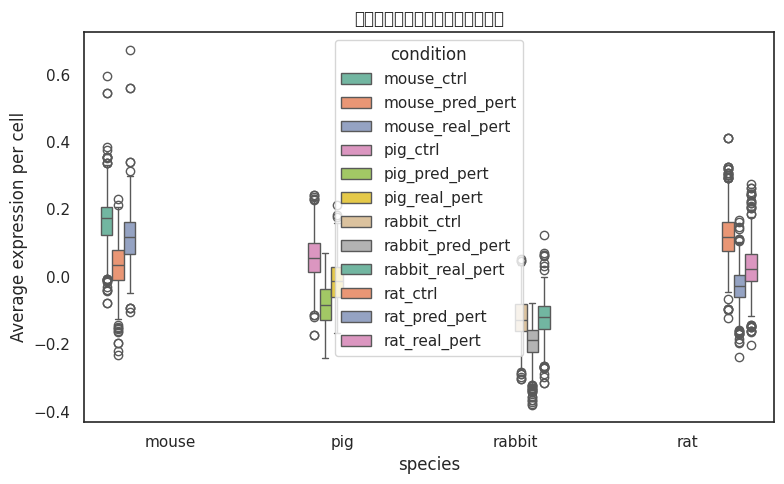

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=adata_all.obs, x="species", y="expr_mean", hue="condition", palette="Set2")
plt.title("不同物种和条件下的整体表达强度")
plt.ylabel("Average expression per cell")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
sc.tl.rank_genes_groups(adata_all, groupby="condition", method="wilcoxon")


/root/anaconda3/envs/couplevae/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/root/anaconda3/envs/couplevae/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/root/anaconda3/envs/couplevae/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/root/anaconda3/envs/couplevae/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/root/anaconda3/envs/couplevae/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldc

In [ ]:
# scale and store results in layer
adata_all.layers["scaled"] = sc.pp.scale(adata_all, copy=True).X

/root/anaconda3/envs/couplevae/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


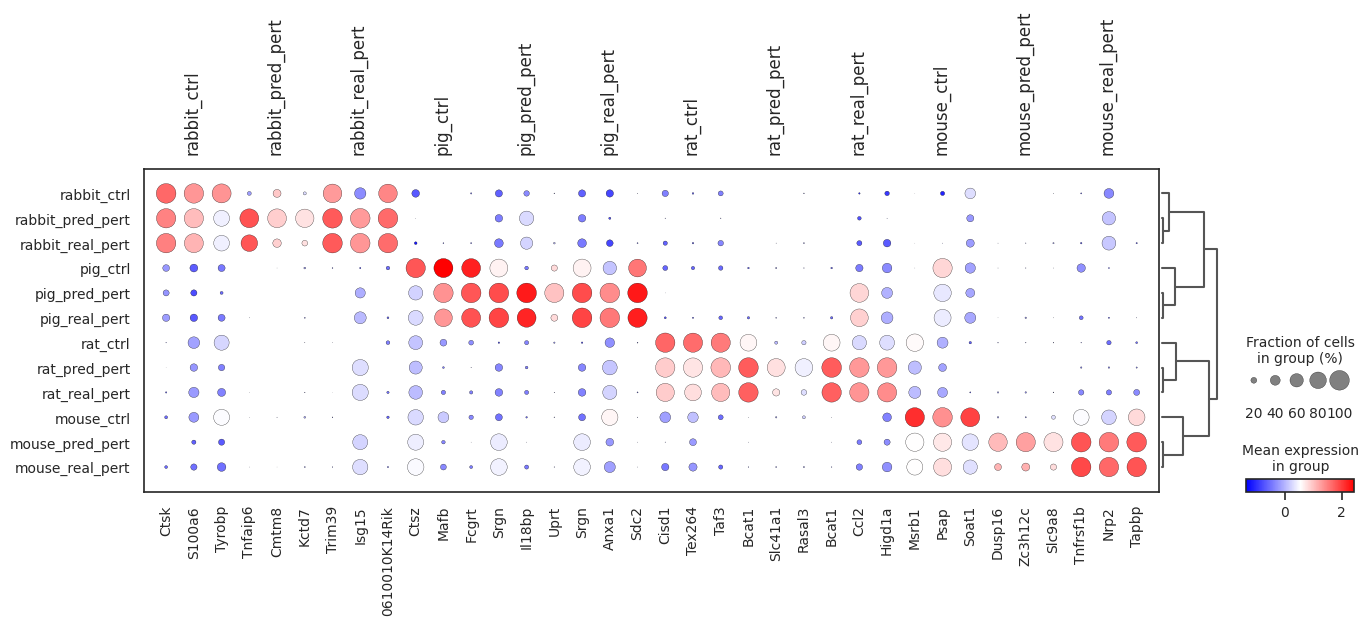

In [ ]:
sc.pl.rank_genes_groups_dotplot(
    adata_all,
    n_genes=3,
    # values_to_plot="logfoldchanges",
    # min_logfoldchange=3,
    # vmax=7,
    # vmin=-7,
    cmap="bwr",
)

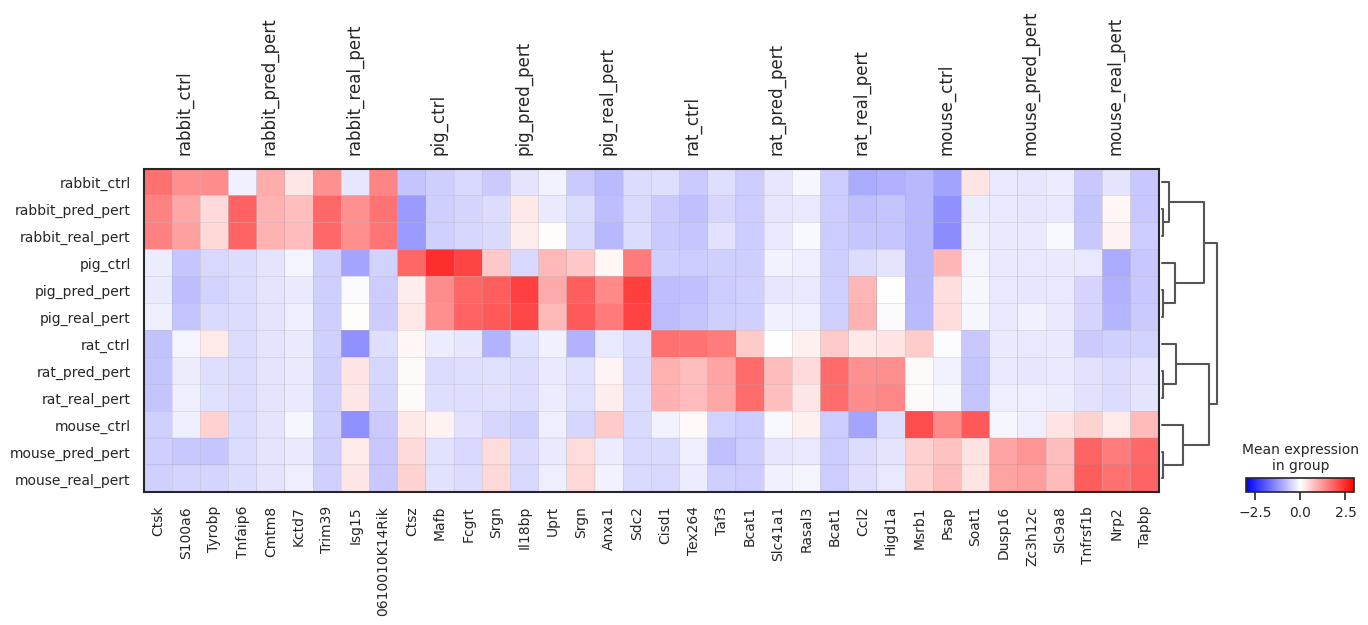

In [ ]:
sc.pl.rank_genes_groups_matrixplot(
    adata_all, n_genes=3, use_raw=False, vmin=-3, vmax=3, cmap="bwr", layer="scaled"
)

In [ ]:
# import scanpy as sc
# from matplotlib.pyplot import rc_context
# sc.pl.rank_genes_groups_stacked_violin(adata_all, n_genes=2, cmap="viridis_r")

In [ ]:
# 选择物种
species = "rat"

# 选择表达矩阵（通常是 .X）
control = adata_all[(adata_all.obs["condition"] == f"{species}_ctrl")].X
real_pert = adata_all[(adata_all.obs["condition"] == f"{species}_real_pert")].X
pred_pert = adata_all[(adata_all.obs["condition"] == f"{species}_pred_pert")].X

# 如果是稀疏矩阵，转为 dense
if hasattr(control, "toarray"):
    control = control.toarray()
    real_pert = real_pert.toarray()
    pred_pert = pred_pert.toarray()


In [ ]:
import numpy as np

# 计算扰动方向向量
delta_real = real_pert.mean(axis=0) - control.mean(axis=0)
delta_pred = pred_pert.mean(axis=0) - control.mean(axis=0)

# 计算余弦相似度
cosine_similarity = np.dot(delta_real, delta_pred) / (
    np.linalg.norm(delta_real) * np.linalg.norm(delta_pred)
)

print(f"Cosine similarity between real and predicted perturbation directions: {cosine_similarity:.3f}")


Cosine similarity between real and predicted perturbation directions: 0.944


/tmp/ipykernel_1412742/2226949993.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


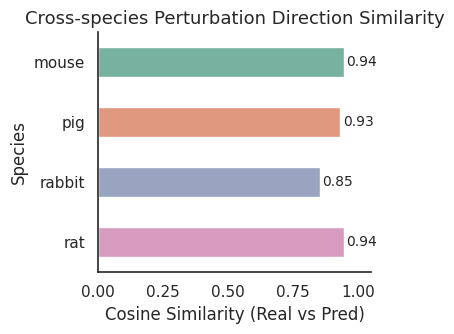

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 数据准备
species_list = ["mouse", "pig", "rabbit", "rat"]
sim_scores = [0.9449, 0.9306, 0.8521, 0.9440]

df = pd.DataFrame({
    "Species": species_list,
    "CosineSimilarity": sim_scores
})

# ✅ 适中饱和度色系
custom_colors = sns.color_palette("Set2", len(df))
moderate_colors = [sns.desaturate(c, 0.85) for c in custom_colors]

# ✅ 开始绘图
plt.figure(figsize=(4, 3.5))
sns.set_style("white")  # 去掉背景网格
ax = sns.barplot(
    data=df,
    y="Species",
    x="CosineSimilarity",
    palette=moderate_colors,
    orient='h',
    width=0.5
)

# ✅ 添加数值标签
for i, v in enumerate(df["CosineSimilarity"]):
    plt.text(v + 0.01, i, f"{v:.2f}", va='center', fontsize=10)

# ✅ 美化图表
plt.xlabel("Cosine Similarity (Real vs Pred)", fontsize=12)
plt.ylabel("Species", fontsize=12)
plt.xlim(0, 1.05)
plt.title("Cross-species Perturbation Direction Similarity", fontsize=13)
sns.despine()  # 去掉右边和上边边框
plt.tight_layout()
plt.show()


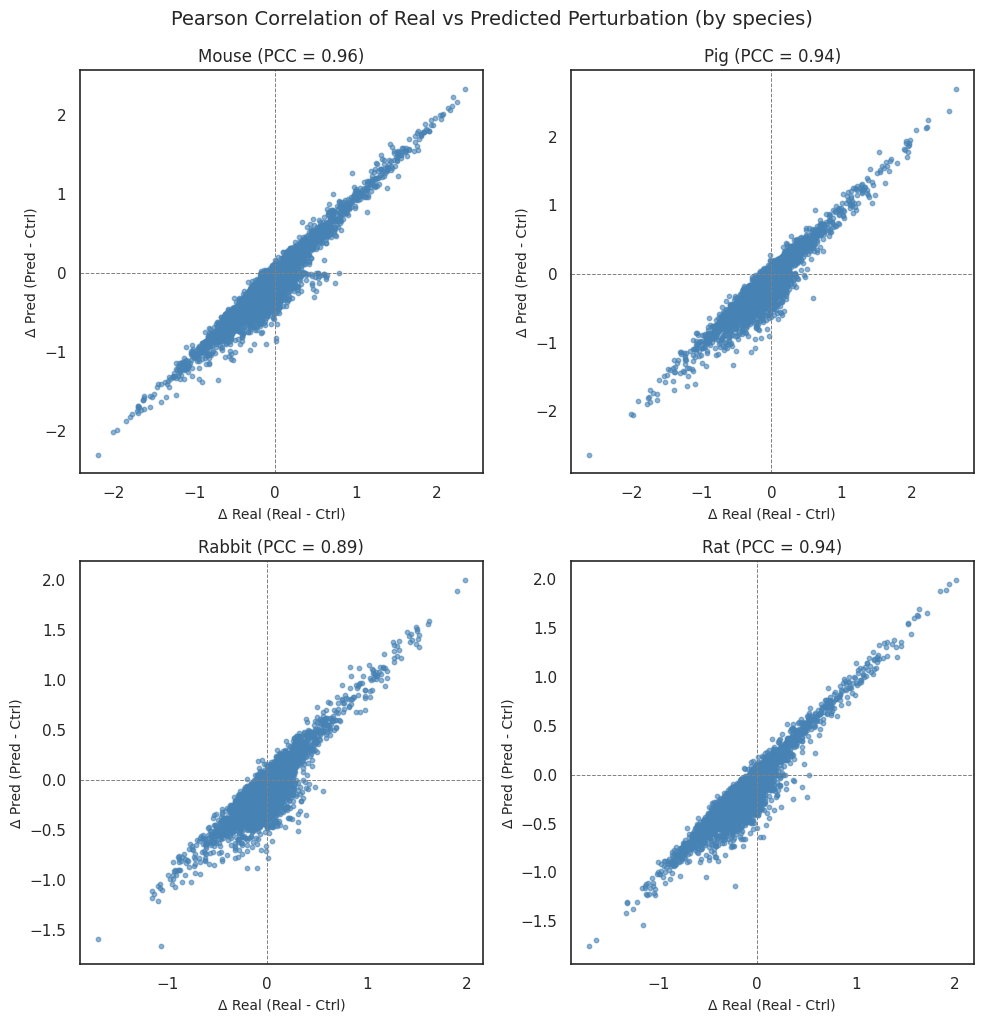

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# 设置物种列表
species_list = ["mouse", "pig", "rabbit", "rat"]

# 创建画布
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, sp in enumerate(species_list):
    # 提取对应子集
    adata_sp = adata_all[adata_all.obs["species"] == sp]
    adata_ctrl = adata_sp[adata_sp.obs["condition"] == f"{sp}_ctrl"]
    adata_real = adata_sp[adata_sp.obs["condition"] == f"{sp}_real_pert"]
    adata_pred = adata_sp[adata_sp.obs["condition"] == f"{sp}_pred_pert"]

    # 计算平均表达
    ctrl = adata_ctrl.X.mean(axis=0)
    real = adata_real.X.mean(axis=0)
    pred = adata_pred.X.mean(axis=0)

    # 稀疏矩阵处理
    if hasattr(ctrl, "toarray"): ctrl = ctrl.toarray()
    if hasattr(real, "toarray"): real = real.toarray()
    if hasattr(pred, "toarray"): pred = pred.toarray()

    # 计算表达差值向量
    delta_real = (real - ctrl).flatten()
    delta_pred = (pred - ctrl).flatten()

    # 计算皮尔逊相关系数
    pcc, _ = pearsonr(delta_real, delta_pred)

    # 作图
    ax = axs[i // 2, i % 2]
    ax.scatter(delta_real, delta_pred, s=10, alpha=0.6, color='steelblue')
    ax.set_title(f"{sp.capitalize()} (PCC = {pcc:.2f})", fontsize=12)
    ax.set_xlabel("Δ Real (Real - Ctrl)", fontsize=10)
    ax.set_ylabel("Δ Pred (Pred - Ctrl)", fontsize=10)
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.7)
    ax.axvline(0, color='gray', linestyle='--', linewidth=0.7)

# 布局美化
plt.tight_layout()
plt.suptitle("Pearson Correlation of Real vs Predicted Perturbation (by species)", fontsize=14, y=1.02)
plt.show()


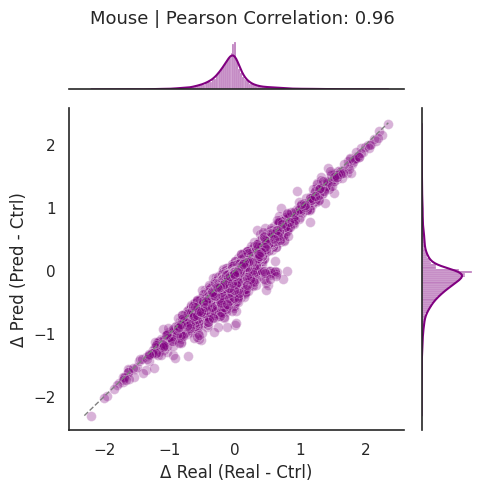

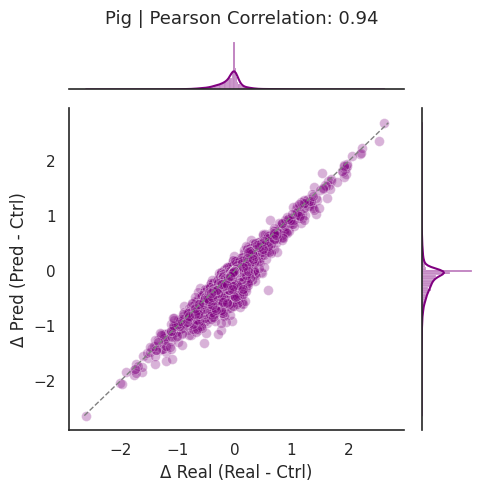

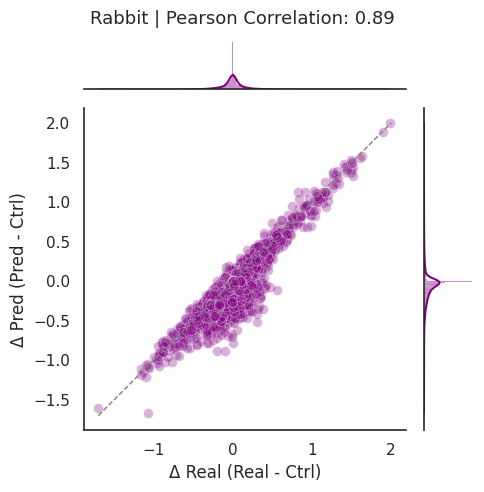

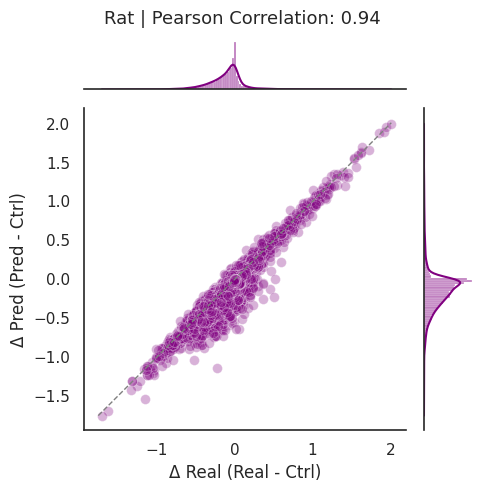

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

species_list = ["mouse", "pig", "rabbit", "rat"]

for sp in species_list:
    # 子集提取
    adata_sp = adata_all[adata_all.obs["species"] == sp]
    adata_ctrl = adata_sp[adata_sp.obs["condition"] == f"{sp}_ctrl"]
    adata_real = adata_sp[adata_sp.obs["condition"] == f"{sp}_real_pert"]
    adata_pred = adata_sp[adata_sp.obs["condition"] == f"{sp}_pred_pert"]

    # 平均表达
    ctrl = adata_ctrl.X.mean(axis=0)
    real = adata_real.X.mean(axis=0)
    pred = adata_pred.X.mean(axis=0)
    if hasattr(ctrl, "toarray"): ctrl = ctrl.toarray()
    if hasattr(real, "toarray"): real = real.toarray()
    if hasattr(pred, "toarray"): pred = pred.toarray()

    delta_real = (real - ctrl).flatten()
    delta_pred = (pred - ctrl).flatten()

    # 计算 PCC
    pcc, _ = pearsonr(delta_real, delta_pred)

    # 创建 jointplot（紫色、放大点、边缘密度）
    g = sns.jointplot(
        x=delta_real,
        y=delta_pred,
        kind="scatter",
        color="purple",
        edgecolor="white",
        s=50,        # 点大小更大
        alpha=0.3,  # 更不透明
        # marginal_kws=dict(bins=100, fill=True),  # 或 kde=True 平滑一下
        marginal_kws=dict(kde=True, fill=True),
        height=5
    )

    # 添加参考对角线 y = x
    lims = [
        min(delta_real.min(), delta_pred.min()),
        max(delta_real.max(), delta_pred.max())
    ]
    g.ax_joint.plot(lims, lims, "--", color="gray", linewidth=1)
    

    # 添加标题和坐标轴
    g.fig.suptitle(f"{sp.capitalize()} | Pearson Correlation: {pcc:.2f}", fontsize=13)
    g.set_axis_labels("Δ Real (Real - Ctrl)", "Δ Pred (Pred - Ctrl)")
    g.fig.tight_layout()
    g.fig.subplots_adjust(top=0.92)

    plt.show()


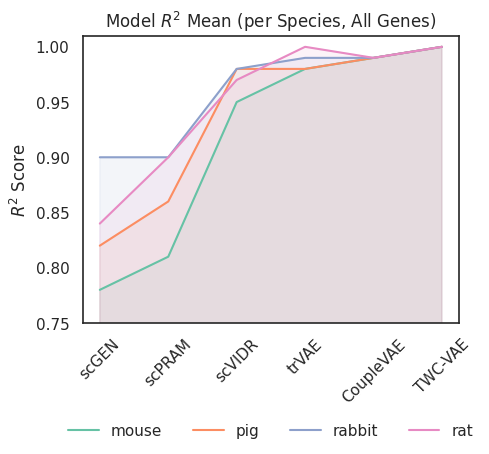

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 数据
species_list = ["mouse", "pig", "rabbit", "rat"]
models = ["TWC-VAE", "CoupleVAE", "scPRAM", "scGEN", "trVAE", "scVIDR"]
your_values = [
    [1, 0.99, 0.81, 0.78, 0.98, 0.95],
    [1, 0.99, 0.86, 0.82, 0.98, 0.98],
    [1, 0.99, 0.90, 0.90, 0.99, 0.98],
    [1, 0.99, 0.90, 0.84, 1.00, 0.97],
]

# 构建 DataFrame
data = pd.DataFrame(your_values, index=species_list, columns=models)

# 排序模型顺序
# model_order = data.max(axis=0).sort_values().index.tolist()
model_order = data.mean(axis=0).sort_values().index.tolist()

data_sorted = data[model_order]

# 绘图
colors = sns.color_palette("Set2", n_colors=4)
plt.figure(figsize=(5, 5))
x = np.arange(len(model_order))

# 每个物种一条线 + 面积填充
for i, species in enumerate(data_sorted.index):
    y = data_sorted.loc[species].values
    plt.plot(x, y, color=colors[i], label=species)
    plt.fill_between(x, y, alpha=0.1, color=colors[i])
plt.ylim(0.75, 1.01)  # 放大 y 轴视觉差距

# x轴设置
plt.xticks(x, model_order, rotation=45)
# plt.xlabel("Model")
# 设置标题和 y 轴为数学字体
plt.ylabel(r"$R^2$ Score")
plt.title(r"Model $R^2$ Mean (per Species, All Genes)")

# plt.ylabel("Score")
# plt.title(r"Model $R^2$ Mean (per Species, All Genes)")

# plt.title("Area Plot of Each Species Across Models")
# plt.legend(title="Species", loc='upper left')
# 图例放到底部
plt.legend(
    # title="Species",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.3),
    ncol=4,
    frameon=False
)

plt.tight_layout()
plt.show() 

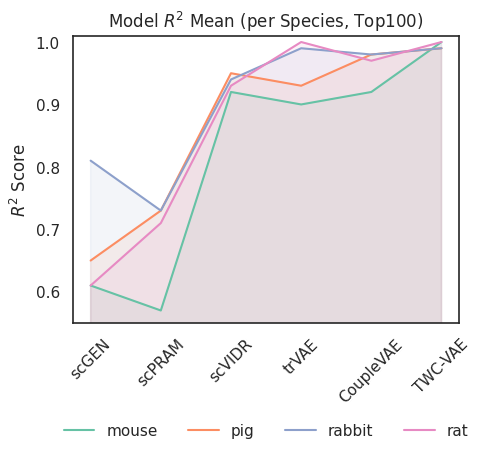

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 数据
species_list = ["mouse", "pig", "rabbit", "rat"]
models = ["TWC-VAE", "CoupleVAE", "scPRAM", "scGEN", "trVAE", "scVIDR"]
your_values = [
    [1, 0.92, 0.57, 0.61, 0.90, 0.92],
    [0.99, 0.98, 0.73, 0.65, 0.93, 0.95],
    [0.99, 0.98, 0.73, 0.81, 0.99, 0.94],
    [1, 0.97, 0.71, 0.61, 1.00, 0.93],
]

# 构建 DataFrame
data = pd.DataFrame(your_values, index=species_list, columns=models)

# 排序模型顺序
# model_order = data.max(axis=0).sort_values().index.tolist()
model_order = data.mean(axis=0).sort_values().index.tolist()

data_sorted = data[model_order]

# 绘图
colors = sns.color_palette("Set2", n_colors=4)
plt.figure(figsize=(5, 5))
x = np.arange(len(model_order))

# 每个物种一条线 + 面积填充
for i, species in enumerate(data_sorted.index):
    y = data_sorted.loc[species].values
    plt.plot(x, y, color=colors[i], label=species)
    plt.fill_between(x, y, alpha=0.1, color=colors[i])
plt.ylim(0.55, 1.01)  # 放大 y 轴视觉差距

# x轴设置
plt.xticks(x, model_order, rotation=45)
# plt.xlabel("Model")
# 设置标题和 y 轴为数学字体
plt.ylabel(r"$R^2$ Score")
plt.title(r"Model $R^2$ Mean (per Species, Top100)")

# plt.ylabel("Score")
# plt.title(r"Model $R^2$ Mean (per Species, All Genes)")

# plt.title("Area Plot of Each Species Across Models")
# plt.legend(title="Species", loc='upper left')
# 图例放到底部
plt.legend(
    # title="Species",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.3),
    ncol=4,
    frameon=False
)

plt.tight_layout()
plt.show() 

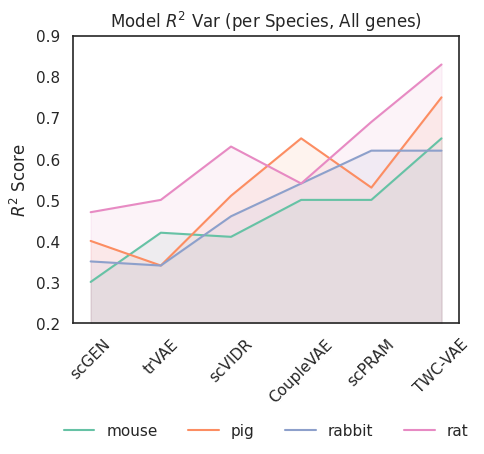

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 数据
species_list = ["mouse", "pig", "rabbit", "rat"]
models = ["TWC-VAE", "CoupleVAE", "scPRAM", "scGEN", "trVAE", "scVIDR"]
your_values = [
    [0.65, 0.50, 0.50, 0.30, 0.42, 0.41],
    [0.75, 0.65, 0.53, 0.40, 0.34, 0.51],
    [0.62, 0.54, 0.62, 0.35, 0.34, 0.46],
    [0.83, 0.54, 0.69, 0.47, 0.50, 0.63],
]

# 构建 DataFrame
data = pd.DataFrame(your_values, index=species_list, columns=models)

# 排序模型顺序
# model_order = data.max(axis=0).sort_values().index.tolist()
model_order = data.mean(axis=0).sort_values().index.tolist()

data_sorted = data[model_order]

# 绘图
colors = sns.color_palette("Set2", n_colors=4)
plt.figure(figsize=(5, 5))
x = np.arange(len(model_order))

# 每个物种一条线 + 面积填充
for i, species in enumerate(data_sorted.index):
    y = data_sorted.loc[species].values
    plt.plot(x, y, color=colors[i], label=species)
    plt.fill_between(x, y, alpha=0.1, color=colors[i])
plt.ylim(0.2, 0.9)  # 放大 y 轴视觉差距

# x轴设置
plt.xticks(x, model_order, rotation=45)
# plt.xlabel("Model")
# 设置标题和 y 轴为数学字体
plt.ylabel(r"$R^2$ Score")
plt.title(r"Model $R^2$ Var (per Species, All genes)")

# plt.ylabel("Score")
# plt.title(r"Model $R^2$ Mean (per Species, All Genes)")

# plt.title("Area Plot of Each Species Across Models")
# plt.legend(title="Species", loc='upper left')
# 图例放到底部
plt.legend(
    # title="Species",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.3),
    ncol=4,
    frameon=False
)

plt.tight_layout()
plt.show() 

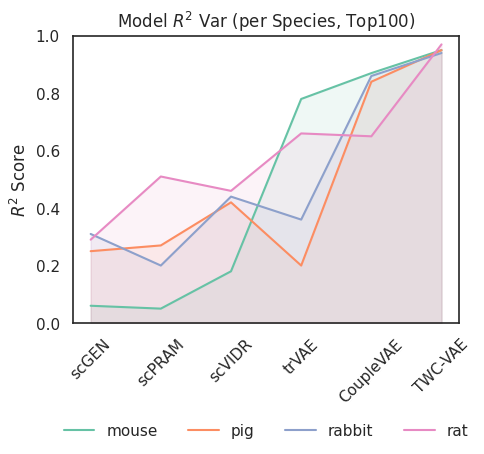

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 数据
species_list = ["mouse", "pig", "rabbit", "rat"]
models = ["TWC-VAE", "CoupleVAE", "scPRAM", "scGEN", "trVAE", "scVIDR"]
your_values = [
    [0.95, 0.87, 0.05, 0.06, 0.78, 0.18],
    [0.95, 0.84, 0.27, 0.25, 0.20, 0.42],
    [0.94, 0.86, 0.20, 0.31, 0.36, 0.44],
    [0.97, 0.65, 0.51, 0.29, 0.66, 0.46],
]

# 构建 DataFrame
data = pd.DataFrame(your_values, index=species_list, columns=models)

# 排序模型顺序
# model_order = data.max(axis=0).sort_values().index.tolist()
model_order = data.mean(axis=0).sort_values().index.tolist()

data_sorted = data[model_order]

# 绘图
colors = sns.color_palette("Set2", n_colors=4)
plt.figure(figsize=(5, 5))
x = np.arange(len(model_order))

# 每个物种一条线 + 面积填充
for i, species in enumerate(data_sorted.index):
    y = data_sorted.loc[species].values
    plt.plot(x, y, color=colors[i], label=species)
    plt.fill_between(x, y, alpha=0.1, color=colors[i])
plt.ylim(0.0, 1.0)  # 放大 y 轴视觉差距

# x轴设置
plt.xticks(x, model_order, rotation=45)
# plt.xlabel("Model")
# 设置标题和 y 轴为数学字体
plt.ylabel(r"$R^2$ Score")
plt.title(r"Model $R^2$ Var (per Species, Top100)")

# plt.ylabel("Score")
# plt.title(r"Model $R^2$ Mean (per Species, All Genes)")

# plt.title("Area Plot of Each Species Across Models")
# plt.legend(title="Species", loc='upper left')
# 图例放到底部
plt.legend(
    # title="Species",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.3),
    ncol=4,
    frameon=False
)

plt.tight_layout()
plt.show() 